### İsmail Ata İnan

### 2017400129

# Final Answers

## Question 1

**The solution in this section is partially referenced from https://math.stackexchange.com/questions/25371/how-to-find-a-basis-for-the-intersection-of-two-vector-spaces-in-mathbbrn/3322086#3322086.**

The column space of $A$ is described by the columns of $Q_A$ and it can be obtained by QR factorization of $A$. Therefore, we first obtain $Q_A$. Note that since $A$ is not a square matrix even if it is full rank, we should use the number of rank columns of $Q_A$ from starting from the first column. We do the same for $B$ and obtain $Q_B$. These columns of $Q_A$ and $Q_B$ define the vector spaces for column spaces of $A$ and $B$ respectively.

We are looking for $\textit{range(A)} \cap \textit{range(B)}$ which the intersection of their column spaces. We recognize that some nonzero vectors $x$ and $y$ for intersection space should satisfy

$v = Q_A x = Q_B y$

where $v$ is a vector By making some matrix manipulations, we can rearrange this problem to a finding nullspace problem. We define an augmented matrix $C = [Q_A | -Q_B]$, where $-Q_B$ is the negative version of $Q_B$. $C$ is possible since $Q_A$ and $Q_B$ has the same number of rows. Now, define a new vector $z = \begin{bmatrix}
x\\
y
\end{bmatrix}$. The problem above now becomes the same problem as $Cz = 0$. This is finding a nullspace problem from now on. Since we know it from Linear Algebra courses, I will not go into the detail of how to find nullspace for a matrix. Rather, I take a matrix $D$ as given whose columns form a basis of orthonormal vectors for nullspace of $C$.

Notice that each column again has the form $\begin{bmatrix}
x\\
y
\end{bmatrix}$. Now, take $i$th column of $D$ as $d_i$. Therefore, let us define $d_i$ as $\begin{bmatrix}
x_i\\
y_i
\end{bmatrix}$. By our first definition, $Q_A x_i = Q_B y_i$ and let us say they yield $v_i$. $v_i$ is a vector in the intersection space $\textit{range(A)} \cap \textit{range(B)}$. We can compute $v_i$s for all possible $i$s determined by the rank of $A$ or $B$, whichever is minimal. These set of vectors $v_i$ for all possible $i$ span the null space of $C$, meaning spanning $\textit{range(A)} \cap \textit{range(B)}$. They are orthogonal since I stated that $D$ has orthonormal columns.

We need to show also that $v_i$s are linearly independent to show that they form a basis for the intersection space. Suppose we have the equation $\sum_i k_i v_i = 0$. Then we should have $Q_A (\sum_i k_i x_i) = 0$ and $Q_B (\sum_i k_i y_i) = 0$. But we know that the nullspace of $Q_A$ and $Q_B$ has only 1 vector, the $0$ vector because they have orthonormal columns. This results in the equations $\sum_i k_i x_i = 0$ and $\sum_i k_i y_i = 0$. These 2 equations are equaivalent to $\sum_i k_i d_i = 0$. On the other hand, we know the columns of $D$ are linearly independent and $d_i$ denotes the $i$th column of $D$. Thus, we obtain $k_i = 0$ for all $i$. This proves that the $v_i$s are linearly independent.

### a)

Here, we check that whether ranks of $C$ and $[ C \ \ X ]$ is the same where each column of $X$ should contain a vector in the intersection space. $C$ is defined as exactly in the above explanations. The ranks of $C$ and the augmented matrices $[ C \ \ X ]$ must be the same if the columns of $X$ are in the intersection subspace. This is due to the fact that if the columns of $X$ are in the intersection subspace, then they are in the column space of $A$ and $B$. Since the columns of $C$ are formed from the basis vectors for column space of $A$ and $B$, the space spanned by these basis vectors also includes the vectors in $X$. Therefore, when appended to the end of $C$, the columns of $X$ does not extend the column space of $C$ and does not affect the space spanned by the column space of $C$. Thus, the ranks of $C$ and $[ C \ \ X ]$ are the same.

In [1]:
import numpy as np

def verify(C, X):
    if C.size != 0:
        if len(X.shape) == 1:
            X = X[:, None]
        augment = np.hstack((C, X))
        return np.linalg.matrix_rank(C) == np.linalg.matrix_rank(augment)
    else:
        return not np.any(X)

### b)

The ideas explained above are implemented one by one. The nullspace of $C$ is to be found here. To find this nullspace, we first compute the SVD decomposition of $C$. Let $C = U_C \Sigma_C V_C^T$. 

From here, we use the following facts about the orthogonal matrices $U_C$ and $V_C$. The singular values are all correspond to a dimension in column space. Say there are $w$ singular values. This column space then is spanned by first $w$ columns of $U_C$. The row space of $C$ is spanned by first $w$ columns of $V_C$. The remaining columns of $V_C$ span exactly the nullspace of $C$. Since $V_C$ was an orthogonal vector with orthonoraml columns, these remaining columns of $V_C$ are eaxctly what we want in our algorithm.

In [2]:
def intersect(A, B):
    # define Q_A and column space of A
    rankA = np.linalg.matrix_rank(A)
    Q_A, _ = np.linalg.qr(A)
    colspace_A = Q_A[:, :rankA]
    
    # define Q_B and column space of B
    rankB = np.linalg.matrix_rank(B)
    Q_B, _ = np.linalg.qr(B)
    colspace_B = Q_B[:, :rankB]
    
    # define C as above
    C = np.hstack((colspace_A, -colspace_B))
    _, sigmas, V_CT = np.linalg.svd(C)
    rankC = len(sigmas > 1e-10)
    nullspace_C = V_CT.T[:, rankC:]
    
    intersectbasis = colspace_A @ nullspace_C[:colspace_A.shape[1]]
    
    # Normalize the basis vectors to make them unit vectors
    for col in range(intersectbasis.shape[1]):
        intersectbasis[:,col] /= np.linalg.norm(intersectbasis[:,col])

    return intersectbasis, C

### c)

Note that the resulting basis vectors for **Test Case 1** was different when I ran this exactly the same notebook on Google Colab and Jupyter Notebook. I think this difference is because of the library versions or operating system. I executed the notebook on Macbook Pro using Jupyter Notebook on kernel **cmpe482** and obtained the following results.

In [3]:
#Test Case 1
A = np.load('./data/Q1_A1.npy')
B = np.load('./data/Q1_B1.npy')

intersectbasis, C = intersect(A, B)
print('Basis vectors for intersection in Test Case 1:\n', intersectbasis)

Basis vectors for intersection in Test Case 1:
 [[ 2.64907865e-01  5.52900929e-01]
 [ 7.66124745e-04  4.60033702e-02]
 [ 1.99954420e-02  8.21876460e-02]
 [ 9.13529004e-01  1.14323844e-01]
 [ 3.08039246e-01 -8.19975306e-01]]


In [4]:
print('Verification of Test Case 1:\n', verify(C, intersectbasis))

Verification of Test Case 1:
 True


In [5]:
#Test Case 2
A = np.load('./data/Q1_A2.npy')
B = np.load('./data/Q1_B2.npy')

intersectbasis, C = intersect(A, B)
print('Basis vectors for intersection in Test Case 2:\n', intersectbasis)

Basis vectors for intersection in Test Case 2:
 []


In [6]:
print('Verification of Test Case 2:\n', verify(C, intersectbasis))

Verification of Test Case 2:
 True


## Question 2

### a)

$f$ makes updates on $x$ in each iteration to make matrix multiplication $Ax$ closer to $b$. We can do this updates in each iteration. Say we are in $(t-1)$th iteration. Take $A x_{t-1} = \hat{b}$. We need a loss function here to evaluate how much we are wrong with our approximation. We will use the norm of the squared error(residual) vector. The error vector is $r = b - \hat{b} = b - Ax_{t-1}$. And our loss is $L = \dfrac{1}{2} r^T r = \dfrac{1}{2} ||r||^2$. To make updates on $x$, we need the gradient $\dfrac{\partial L}{\partial x_{t-1}}$, which can be formed as $\dfrac{\partial L}{\partial r} \cdot \dfrac{\partial r}{\partial x}$. We calculate

$\dfrac{\partial L}{\partial r} = r$ and

$\dfrac{\partial r}{\partial x} = -A$

We obtain $\dfrac{\partial L}{\partial x_{t-1}} = r \cdot -A$ but this dot product does not valid because of the dimensions. Thus, we rearrange the components to get $\dfrac{\partial L}{\partial x_{t-1}} = - A^T \cdot r = - A^T \cdot (b - A x_{t-1})$. Now, let us get to $f$. $f$ should be in the form

$x_{t-1} - \eta \dfrac{\partial L}{\partial x}$ since $x_t = f(x_{t-1})$

Therefore, we obtain

$f(x_{t-1}) = x_{t-1} - \eta (- A^T \cdot r) = x_{t-1} - \eta (- A^T \cdot (b - A x_{t-1})) = x_{t-1} + \eta (A^T \cdot (b - A x_{t-1})) = x_{t-1} + \eta (A^Tb - A^T A x_{t-1})$.

### b)

We know $x_t = x_{t-1}$. For the case $x^*$ which is the optimal least squares solution, we obtain $x^* = f(x^*)$. Therefore, $|| x_t - x^* || = || f(x_{t-1}) - f(x^*) ||$. We can repeat this operation for all $x_t$s up to $t = 0$ by

$|| f(x_t) - f(x^*) || \leq L_{\eta} || f(x_{t-1}) - f(x^*) || \leq L_{\eta}^2 || f(x_{t-2}) - f(x^*) || … \leq L_{\eta}^{t+1} || f(x_0) - f(x^*) ||$

If $L_{\eta}^{t+1} || f(x_0) - f(x^*) ||$ converges to a value, the expression $|| f(x_t) - f(x^*) ||$ also converges. So we need $L_{\eta} < 1$ exactly. Now let us get back to general expression $|| f(x) - f(x') ||$. We get

$|| f(x) - f(x') || = || x + \eta (A^Tb - A^T A x) - x' - \eta (A^Tb - A^T A x') || = || (I - \eta A^T A)(x - x') || \leq || I - \eta A^T A || \ || x - x' ||$

By the definition in the question, we can directly say that $L_{\eta} = || I - \eta A^T A ||$. For convergence, we need 

$|| I - \eta A^T A || < 1$

Otherwise, the expression diverges. Critical $\eta^*$ is found using this inequality. The implementation is below and uses an iterative approach using eigenvalues of $L_{\eta}$.

In [7]:
# This code segment is written with the references of Taylan Cemgil.
K = 100000
etas = np.linspace(0.0, 0.5, K)

def critical_eta(etas, A):
    
    D = A.shape[1]
    minval = np.Inf
    criteta = 0
    
    for i, eta in enumerate(etas):
        # taking the 2 norm of the expression
        curnorm = np.linalg.norm(np.eye(D) - eta * A.T @ A, ord=2)
        
        if curnorm > 1:
            return criteta
        else:
            criteta = eta
        
    return criteta

### c)

In [8]:
# Test Case 1
A = np.load('./data/Q2_A1.npy')
b = np.load('./data/Q2_b1.npy')

criteta = critical_eta(etas, A)
print('Critical eta for Test Case 1:\n',criteta)

Critical eta for Test Case 1:
 0.014410144101441013


In [9]:
# Test Case 2
A = np.load('./data/Q2_A2.npy')
b = np.load('./data/Q2_b2.npy')

criteta = critical_eta(etas, A)
print('Critical eta for Test Case 2:\n',criteta)

Critical eta for Test Case 2:
 0.005025050250502505


## Question 3

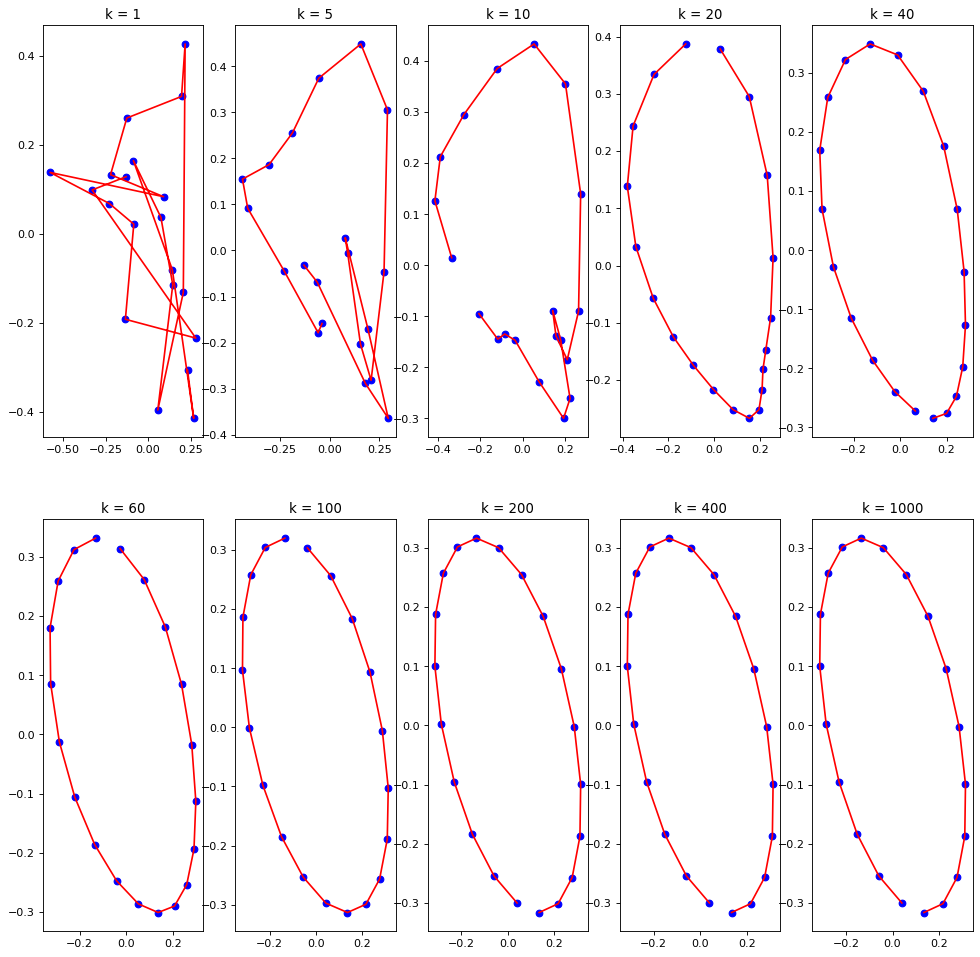

In [10]:
import matplotlib.pyplot as plt

N = 20
K = 1000
plotset = set([1,5,10,20,40,60,100,200,400,1000])
plotnum = 1
plt.figure(figsize=(15,15), dpi=80)

x = np.random.normal(size=N)
x[-1] = -np.sum(x[:-1])
y = np.random.normal(size=N)
y[-1] = -np.sum(y[:-1])

for k in range(1,K+1):
    x = (x + np.roll(x, -1))/2
    x /= np.linalg.norm(x, ord=2)
    y = (y + np.roll(y, -1))/2
    y /= np.linalg.norm(y, ord=2)
    if k in plotset:
        plt.subplot(2,5,plotnum)
        plt.scatter(x, y, color='b')
        plt.plot(x, y, color='r')
        plt.title('k = ' + str(k))
        plotnum += 1

plt.show()

### b)

In each iteration, each value of vector $x$ is summed by the value in the next index and this is done by a circular manner. Therefore, the value at last index is summed by the value by the value at first index and each resulting value is divided by 2. The algorithm up to now is exacly a 2-point averager which averages with the value at the next index. The same operations are also valid for $y$. Lastly, $x$ and $y$ are normalized with respect to 2-norm since the 2 point averaging breaks the unit vector property of each vector. However, by the property of averaging, the property of having all elements sum to 0 is not broken for $x$ and $y$.

In the graphical plot, each point is transferred to the midpoint of the line connecting the original point and the point in the next index. This behaviour results in cropping the sharp angle degrees between lines connecting points. In other words, the degree of the angle between lines observed in each data point increases in iteration, since the sharp directions changes are cropped out and the sharp direction changes mean small angles.

After many iterations, the angle degree in each node will be close to each other and each angle will be bigger than $\dfrac{\pi}{4}$ radians because of the cropped sharp corned nodes. If we connect nodes by lines like in **part a**, we will see a circular shape if we have 10 or more nodes(in our case, we have 20) since all of them are connected with more than $\dfrac{\pi}{4}$ radians. In fact, this circular shape will be an ellipse just like in the 1000th iteration.

### c)

If we can find suitable $a^{(k)}$, $b^{(k)}$ and $M$, we are done. Since the algorithm takes a 2-point average first, we can express it with a $M$ such that

$M^{NxN} = \begin{bmatrix}
1/2 & 1/2 & 0 & … & 0 & 0 & 0\\
0 & 1/2 & 1/2 & … & 0 & 0 & 0\\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots\\
0 & 0 & 0 & … & 0 & 1/2 & 1/2\\
1/2 & 0 & 0 & … & 0 & 0 & 1/2
\end{bmatrix} = \dfrac{1}{2} \begin{bmatrix}
1 & 1 & 0 & … & 0 & 0 & 0\\
0 & 1 & 1 & … & 0 & 0 & 0\\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots\\
0 & 0 & 0 & … & 0 & 1 & 1\\
1 & 0 & 0 & … & 0 & 0 & 1
\end{bmatrix}$

Now, we need a normalizer to obtain unit vectors. We use $a^{(k)}$ and $b^{(k)}$ for this purpose and define them as

$a^{(k)} = || M x^{(k)}||$

$b^{(k)} = || M y^{(k)}||$

Therefore, we define $x^{(k+1)}$ and $y^{(k+1)}$ as

$x^{(k+1)} = \dfrac{1}{|| M x^{(k)}||} M x^{(k)}$

$y^{(k+1)} = \dfrac{1}{|| M y^{(k)}||} M y^{(k)}$

### d)

**The solution in this section is referenced from https://www.cs.cornell.edu/cv/ResearchPDF/PolygonSmoothingPaper.pdf and https://math.stackexchange.com/questions/3510533/eigenvectors-and-eigenvalues-of-shift-matrix**.

We will do some matrix manipulations to find the eigenvaluesof $M$. Firstly, we observe that $M$ is a scaled version of the sum of an identity matrix $I$ and upshift matrix $S$. Therefore,

$M = \dfrac{1}{2} (I + S) = \dfrac{1}{2} (\begin{bmatrix}
1 & 0 & 0 & … & 0 & 0 & 0\\
0 & 1 & 0 & … & 0 & 0 & 0\\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots\\
0 & 0 & 0 & … & 0 & 1 & 0\\
0 & 0 & 0 & … & 0 & 0 & 1
\end{bmatrix} + \begin{bmatrix}
0 & 1 & 0 & … & 0 & 0 & 0\\
0 & 0 & 1 & … & 0 & 0 & 0\\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots\\
0 & 0 & 0 & … & 0 & 0 & 1\\
1 & 0 & 0 & … & 0 & 0 & 0
\end{bmatrix})$

Notice that the eigenvalues of $M$, $\lambda_i$ for $i = 1, …, N$ is the average of eigenvalues of $I$ and $S$. Eigenvalues of $I$ are all $1$, it is obvious. Thus, we now only need to find eigenvalues of $S$.

For this purpose, we analyze $det(S - \lambda I)$. However, $S$ has a $1$ at its bottom left entry which makes it hard for us to generate a general formula. Fortunately, we know that for any matrix $A$, $det(A) = det(A^T)$. We use this property now to find $det(S - \lambda I)$.

$det(S - \lambda I) = det(S^T - \lambda I) = det(\begin{bmatrix}
-\lambda & 0 & 0 & … & 0 & 0 & 1\\
1 & -\lambda & 0 & … & 0 & 0 & 0\\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots\\
0 & 0 & 0 & … & 1 & -\lambda & 0\\
0 & 0 & 0 & … & 0 & 1 & -\lambda
\end{bmatrix})$

I will not go into the details of determinant, therefore I can directly state that this determinant equation characterized by

$det(S - \lambda I) = -\lambda \cdot (-\lambda)^{N-1} + (-1)^{N-1} \cdot 1 = (-1)^{N-1} + (-\lambda)^N$

Now, to find eigenvalues we need

$(-1)^{N-1} + (-\lambda)^N = 0 \ \Rightarrow \ (-\lambda)^N = (-1) \cdot (-1)^{N-1} \Rightarrow \lambda^N = 1$

From the definitions of complex exponentials, we know that the solution of this equaition has the form

$\lambda = e^{\dfrac{i 2 \pi n}{N}}$, where $i$ is the imaginary number with $i^2 = -1$ and $n$ is an integer with $n = 0, …, N - 1$.

From this equation, we derive $N$ eigenvalues of $S$ with $\lambda_{S_j} = e^{\dfrac{i 2 \pi j}{N}}$, $j = 0, …, N - 1$.

From the equality $M = \dfrac{1}{2} (I + S)$, we observe that $j$th eigenvalue of $M$ is the sum of $j$th eigenvalues of $I$ and $S$ divided by $2$. In mathematical notation,

$\lambda_{M_n} = \dfrac{1}{2} \cdot (\lambda_{I_n} + \lambda_{S_n})$

Since all eigenvalues of the identity matrix $I$ is $1$, we obtain that

$\lambda_{M_n} = (1 + e^{\dfrac{i 2 \pi n}{N}})/2$

for $n$ being an integer with $n = 1, …, N-1$.

In the next step, we find general formula for the eigenvector $v_n$ corresponding to $\lambda_{M_n}$. We start with the eigenvalue/eigenvector equation

$M v_n = \lambda_{M_n} v_n$

We know that the two sides of the equation must be equal entry by entry. Let us inspect the $j$th entry of the resulting vector with this equation $u$.

$u_j = M_j v_{n,j} = \lambda_{M_n} v_{n, j}$

This equation yields

$(v_{n,j} + v_{(n+1)\%2,j})/2 = ((1 + e^{\dfrac{i 2 \pi n}{N}}) \cdot v_{n, j})/2$

By simplifying this equation, we obtain

$v_{(n+1)\%2,j} = e^{\dfrac{i 2 \pi n}{N}} \cdot v_{n, j}$

This result completely specifies the relationship between the components of $v_n$ which can be generalized to all eigenvectors of $M$. Since scaling does not change the space spanned by a vector, let us assume that $v_{n, 1} = 1$ without loss of generality. We obtain by this

$v_{n, 1} = 1$

$v_{n, 2} = e^{\dfrac{i 2 \pi n}{N}}$

$\vdots$

$v_{n, N} = e^{\dfrac{i 2 \pi (N-1)n}{N}}$

We identified all the entries of eigenvector $v_n$ corresponding to eigencalue $\lambda_n$. Finally, we demonstrate the generalized formula for eigenvector $v_n$ as

$v_n^{Nx1} = \begin{bmatrix} 1, \ e^{\dfrac{i 2 \pi n}{N}}, \ … \ e^{\dfrac{i 2 \pi (N-2)n}{N}}, \ e^{\dfrac{i 2 \pi (N-1)n}{N}} \end{bmatrix}^T$

### e)

We need to show that all the vectors $v_1, v_2, …, v_N$ are mutually orthogonal to each other, meaning $v_n^H v_m = 0$ if $n \neq m$. Notice that we are now using **Hermitian** instead of transpose since the eigenvectors are complex-valued vectors. We will use the upshift matrix $S$ in our calculations. Our first claim is that the eigenvectors of $S$ and $M$ are the same. We will prove it first to use $S$ later. Call the $n$th eigenvector of $S$ as $z_n$ and we know the corresponding eigen value as $\lambda_{S_n}$. Then,

$\dfrac{1}{2} (I + S)z_n = \dfrac{1}{2} (z_n + \lambda_{S_n} z_n) = \dfrac{1}{2} (\lambda_{I_n} z_n + \lambda_{S_n} z_n) = \lambda_{M_n} z_n$

We also clearly have

$\dfrac{1}{2} (I + S)z_n = M z_n$

This implies

$M z_n = \lambda_{M_n} z_n$

Therefore, we proved that $z_n$ is the $n$th eigenvector of $M$ and we have the equality $z_n = v_n$ for all integer $n = 1, … N$. From now on, I will refer to the $n$th eigenvector of $S$ and $M$ with $v_n$, the same name.

Now let us observe $v_n^H v_m$ with using $S$ to be able to do some eigenvector manipulations. We start by $v_n^H S v_m$.

$v_n^H S v_m = v_n^H (S v_m) = v_n^H \lambda_{S_m} v_m = \lambda_{S_m} v_n^H v_m$

We record this result to use it later. Now, we start from the same expression but this time we go in a different way.

$v_n^H S v_m = (S^H v_n)^H v_m$

The upshift matrix $S$ has the property that $S^H = S^T = S^{-1}$. We plug in this observation to the last equation. We obtain

$v_n^H S v_m = (S^H v_n)^H v_m = (S^{-1} v_n)^H v_m$

We now need to simplify4 the expression $S^{-1} v_n$ to get a more desirable result. Observe that if $\lambda_{S_n}$ is an eigenvalue of $S$, then $\dfrac{1}{\lambda_{S_n}}$ is a eigenvalue of $S^{-1}$. The prove is referenced from **https://math.stackexchange.com/questions/237871/inverse-matrixs-eigenvalue** and it is as follows:

$S v_n = \lambda_{S_n} v_n \ \Rightarrow \ S^{-1} S v_n = S^{-1} \lambda_{S_n} v_n \ \Rightarrow \ \dfrac{1}{\lambda_{S_n}} v_n = S^{-1} v_n$

Therefore, we have $S^{-1} v_n = \dfrac{1}{\lambda_{S_n}} v_n$ in our equation.

$v_n^H S v_m = (S^H v_n)^H v_m = (S^{-1} v_n)^H v_m = (\dfrac{1}{\lambda_{S_n}} v_n)^H v_m$

Our last observation will be that $(\dfrac{1}{\lambda_{S_n}})^H = \lambda_{S_n}$. Its prove comes from the property that $\lambda_{S_n}$ is a complex number and its magnitude $|\lambda_{S_n}| \cdot |\lambda_{S_n}^*| = 1$. Therefore,

$(\dfrac{1}{\lambda_{S_n}})^H = (\dfrac{\lambda_{S_n}^*}{1})^H = \lambda_{S_n}$

Finally, we extend our equation to

$v_n^H S v_m = (S^H v_n)^H v_m = (S^{-1} v_n)^H v_m = (\dfrac{1}{\lambda_{S_n}} v_n)^H v_m = \lambda_{S_n} v_n^H v_m$

This result is crucial since if we consider the result we recorded above as $v_n^H S v_m = \lambda_{S_m} v_n^H v_m$, we obtain

$v_n^H S v_m = \lambda_{S_m} v_n^H v_m = \lambda_{S_n} v_n^H v_m$

Since we definitely know that $ \lambda_{S_m} \neq \lambda_{S_n}$ when $m \neq n$, we conclude that $v_n^H v_m = 0$. This conclusion leads to the mutual orthogonality of each pair of vectors in $v_1, … v_N$ and we proved that they constitute a orthogonal basis for $R^N$.

### f)

I found the answer for this section in one the academic papers I took reference from and I understood the prove partially. However, it was not feasible to fully explain it here. I am sorry in advance :)
The paper I took reference from : https://www.cs.cornell.edu/cv/ResearchPDF/PolygonSmoothingPaper.pdf

## Question 4

### a)

We need $g_n(c^{(n)}) = (c^{(n)} - a)^2 + b = 0$ for 2 inputs: 0 and 1. Let us try these inputs and see what expressions we will get.

$c^{(n)} = 0 \rightarrow g_n(0) = a^2 + b = 0$
$c^{(n)} = 1 \rightarrow g_n(1) = (1-a)^2 + b = 1 - 2a + a^2 + b = 0$

Since from the first equation $a^2 + b = 0$, we obtain $1 - 2a = 0$ in the second equation. Thus, this yields

$a = 0.5$.

Then we calculate $b$ from first equation as

$b = -0.25$.

### b)

I will firstly consider one component of the objective, namely $f_d(\cdot)$. $f_d$ concerns with the $d$th entry of each data point vector $x^{(n)}$ for $n = 1, …, N$. We can call it $d$th feature of the input vectors. Now, there are 2 essential parts of the equation. One of them evaluates to 0 directly and one of them makes some nonzer computations by the binary structure of cluster ids. $f_d$ computes as follows:

For each data point $x^{(n)}$ in the dataset, take its $d$th feature $x_d^{(n)}$. Then, compute the average of $d$th entries of all the vectors $x^{(m)}$ staying in the same cluster as $x^{(n)}$. After, we subtract this calculated average from $x_d^{(n)}$ and find its absolute value. This operation means that we now have the information how far is $d$th feature of $x^{(n)}$ from the average behaviour of $d$th feature of vectors remaining in the same cluster as $x^{(n)}$. We repeat this for every data point $x^{(n)}$ for $n = 1, …, N$ to obtain a sum of how far was each data point's $d$th feature from the average of its cluster.

$||f(c)||$ is a vector containing the information explained above for each feature $d$th for $d = 1, …, D$ existing in the data points. Therefore, $||f(c)||$ evaluates all the features' of all the data points difference from the average behaviour of these features in the cluster those data points stays in, takes square of the results for each feature and sums them. If we are able to minimize this quantity, every data point will have minimum distance in its features from the average behaviour of these features in the cluster that data point belongs. And therefore, clusters will have more common properties and the similar data points will be separated to same clusters successfully. This will also result in determining the feature properties for clusters.

### c)

In [11]:
import pandas as pd

data = pd.read_csv('./data/Q4_points.csv')
data

,x,y
0,3.252296,3.907374
1,3.410574,4.059557
2,5.843088,4.003425
3,2.808239,4.031608
4,3.200763,5.804546
...,...,...
95,0.434445,0.501088
96,-0.555006,-0.808516
97,-0.273560,-0.690223
98,0.932166,0.620747


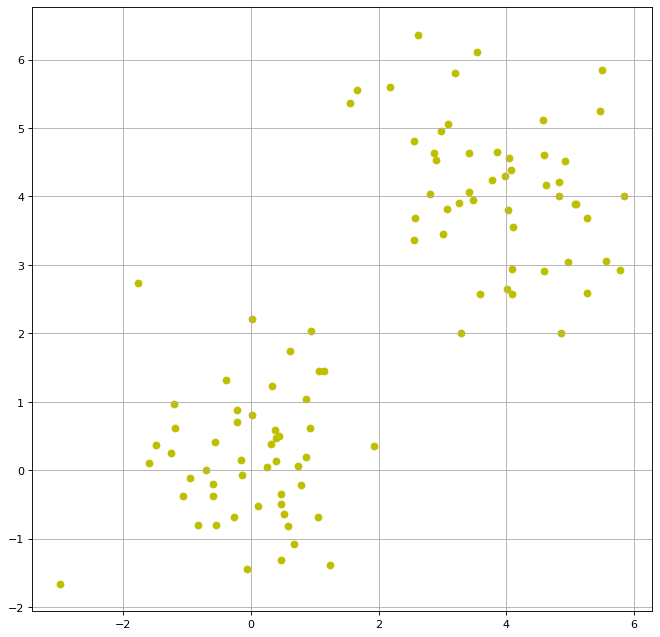

In [12]:
X = np.array(data)

fig, ax = plt.subplots(figsize=(10,10), dpi=80)
ax.scatter(X[:,0], X[:,1], color='y')
plt.grid(b=True, which='major')
plt.show()

### d)

In [13]:
from jax import jacrev
import jax.numpy as jnp

# This function is partially taken from Python Companion of IALA, but I did some modifications to it
# since the Python Companion code was not working properly in each case.
def levenberg_marquardt(f, Df, x2, lambda2, kmax=100, tol=1e-6):
    n = len(x2)
    y = x2
    lam = lambda2
    obj = np.zeros((0,1))
    res = np.zeros((0,1))
    for k in range(kmax):
        obj = np.vstack([obj, np.linalg.norm(f(y))**2])
        res = np.vstack([res, np.linalg.norm(2*Df(y).T @ f(y))])
        if np.linalg.norm(2*Df(y).T @ f(y)) < tol:
            break
        xt = y - np.linalg.inv((Df(y).T @ Df(y)) + np.sqrt(lam)*np.eye(n)) @ np.atleast_1d(Df(y).T @ f(y))
        if np.linalg.norm(f(xt)) < np.linalg.norm(f(y)) :
            lam = 0.8*lam
            y = xt
        else:
            lam = 2.0*lam
    return y, {'Objective':obj, 'Residual':res}

# This function is partially taken from Python Companion of IALA, but I did some modifications to it
# since the Python Companion code was not working properly in each case.
def aug_lag_method(f, Df, g, Dg, x1, lambda1, kmax=100, feas_tol=1e-10, oc_tol=1e-10):
    x = x1
    z = np.zeros(len(g(x)))
    mu = 1.0
    feas_res = [np.linalg.norm(g(x))]
    oc_res = [[np.linalg.norm(2*Df(x).T * f(x) + 2*mu*Dg(x).T*g(x))]]
    lm_iters = []
    for k in range(kmax):
        F = lambda x: np.hstack([f(x), np.sqrt(mu)*(g(x) + z/(2*mu))])
        DF = lambda x: np.block([[Df(x)], [ np.sqrt(mu)*Dg(x)]])
        x, hist = levenberg_marquardt(F, DF, x, lambda1, tol=oc_tol)
        z = z + 2*mu*g(x)
        feas_res.append(np.linalg.norm(g(x)))
        oc_res.append(hist['Residual'][-1])
        lm_iters.append(len(hist['Residual']))
        if np.linalg.norm(g(x)) < feas_tol:
            break
        if ~(np.linalg.norm(g(x)) < 0.25*feas_res[-2]):
            mu = 2*mu   
            
    return x, z, {'lm_iters': lm_iters, 'feas_res': feas_res, 'oc_res': oc_res}

# x is NxD matrix and c is Nx1 vector
def fd(c, d):
    N = X.shape[0]
    firstavg = jnp.sum(X[:, d] * c) / jnp.sum(c)
    secondavg = jnp.sum(X[:, d] * (1 - c)) / jnp.sum(1 - c)
    
    firstloss = jnp.sum(c * (X[:, d] - firstavg))
    secondloss = jnp.sum((1 - c) * (X[:, d] - secondavg))
        
    return firstloss + secondloss

# x is NxD
def f(c):
    sums = 0
    for d in range(X.shape[1]):
        sums += fd(c, d)**2
    return sums

def g(c):
    return (c - 0.5)**2 - 0.25

Df = jacrev(f)
Dg = jacrev(g)

c1 = np.random.uniform(0, 0.5, 50)
c2 = np.random.uniform(0.5, 1, 50)
c = np.hstack((c1, c2))
c, z, hist = aug_lag_method(f, Df, g, Dg, c, 1.0)
print('c:\n', c)

c:
 [1.03283605e-14 4.87101214e-17 1.69093473e-14 5.10637608e-16
 2.35416661e-17 2.00631770e-14 2.40458069e-15 2.06434536e-14
 1.01598940e-14 5.71220636e-16 4.47087660e-15 2.43306794e-15
 1.00743083e-14 3.78209449e-15 4.69750877e-16 2.05640335e-14
 1.29536410e-14 2.87411460e-16 3.35952522e-15 3.15062654e-15
 1.51940687e-15 5.63510853e-16 3.49018135e-16 5.98112051e-16
 1.19051536e-15 6.56959984e-15 2.18198314e-14 1.40358514e-16
 1.69463042e-14 8.46278120e-16 5.99740752e-15 2.62015722e-16
 1.07785571e-15 2.53912663e-15 4.92405297e-13 1.30439626e-15
 7.23371959e-16 2.12694491e-14 9.70616749e-15 7.99600419e-16
 6.19859893e-14 8.13304650e-16 1.09365916e-14 3.81992968e-15
 4.35532007e-12 1.56149542e-14 6.47168479e-16 7.25551358e-15
 1.16719076e-14 2.35275890e-13 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00

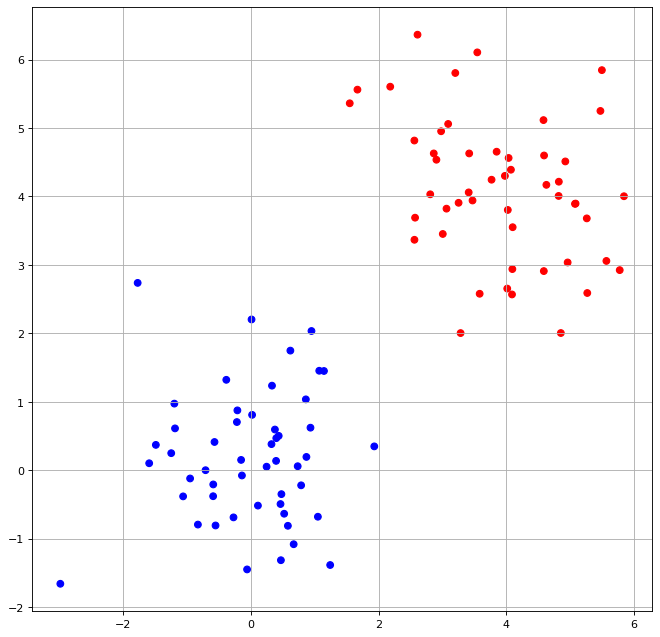

In [14]:
fig, ax = plt.subplots(figsize=(10,10), dpi=80)
colorlist = ['r' if cluster < 1e-5 else 'b' for cluster in c]
ax.scatter(X[:,0], X[:,1], color=colorlist)
plt.grid(b=True, which='major')
plt.show()

# Question 5

### a)

**The solution in this section is partially referenced from the  source https://ekamperi.github.io/mathematics/2020/11/01/principal-component-analysis-lagrange-multiplier.html**

Using the definition for $S$, we can rewrite $\sigma^2 (a_1)$ as

$\sigma^2 (a_1) = a_1^T S a_1$

Using this equation, we form the Lagrangian $L_1(a_1, \lambda_1)$ as

$L_1(a_1, \lambda_1) = a_1^T S a_1 + \lambda_1(1 - a_1^T a_1)$

We can solve this equation for stationary points by taking partial derivatives for $a_1$ and $\lambda_1$.

$\dfrac{\partial L_1}{\partial a_1} = 2 a_1^T S + \lambda_1(-2a_1^T) = 0$

$\dfrac{\partial L_1}{\partial \lambda_1} = 1 - a_1^T a_1 = 0$

The second equation is the same as our initial orthonormality constraint. The first equation yields great information:

$2 a_1^T S + \lambda_1(-2a_1^T) = 0 \ \Rightarrow \ a_1^T S = \lambda_1 a_1^T$

Taking transpose of both sides and considering the dimensions for matrix multiplication $a_1^T S$, we modify the equation as

$S a_1 = \lambda_1 a_1$

Thus, to maximize the Lagrangian $L_1(a_1, \lambda_1)$, we need the eigenvalue and eigenvector equation above to hold.


### b)

Let us assume that $X$ has a SVD decomposition as $X = U \Sigma V^T$. Now we will work on gram-matrix $S$ to obtain some information about $a_1$ and $\lambda_1$. Notice that $S$ is a square matrix with $S^T = S$.

$S = \dfrac{1}{N} X^T X = \dfrac{1}{N} V \Sigma U^T U \Sigma V^T = V (\dfrac{\Sigma^2}{N}) V^T$

The structure of the result we got is exactly a eigendecomposition structure since $\dfrac{\Sigma^2}{N}$ is a square matrix with diagonal entries. Hence, the eigenvalues of $S$ are defined as $\lambda_i = \dfrac{\sigma_i^2}{N}$ for every $i$, where $\sigma_i$ is the $i$th singular value of $X$.

We now found $a_1$ and $\lambda_1$ as eigenvector-eigenvalue pairs but $S$ can have more than one of these pairs and we need to find which of them they correspond to. Now consider the variance equation again, where we need to extract the maximum variance.

$\sigma^2 (a_1) = a_1^T S a_1 = a_1^T \lambda_1 a_1 = \lambda_1 a_1^T a_1 = \lambda_1 ||a_1||^2 = \lambda_1$ since $a_1$ was a unit length vector.

To maximize the variance expression, we need to choose the maximum eigenvalue of $S$ and state it as $\lambda_1$ in the above equation. But since $\lambda_i = \dfrac{\sigma_i^2}{N}$ for eigenvalues of $S$ and also since the singular values of $X$ are in descending order by definition of SVD, we obtain that the eigenvalue with maximum value is the first eigenvalue of $S$, $\lambda_1$ exactly. In addition, its corresponding eigenvector is $v_1$, the first column of $V$. Therefore, we conclude that

$\lambda_1 = \dfrac{\sigma_1^2}{N}$ and

$a_1 = v_1$


### c)

**The solution in this section is partially referenced from the  source https://www.cs.toronto.edu/~urtasun/courses/CSC411_Fall16/tutorial7.pdf**

For $K=2$, we take $A = [a_1 a_2]$. We need to find $a_2$ here and set up a constrained maximization prolem for it as

maximize $\sigma^2(a_2)$ subject to

$||a_2|| = 1\\
a_2^T a_1 = 0$

We here added an additional constraint to ensure the orthonormality of vectors $a_1$ and $a_2$ to satisfy $A^T A - I = 0$. We now construct Lagrangian as

$L_2(a_2, \lambda_2, \beta) = \sigma^2(a_2) + \lambda_2(1 - a_2^T a_2) + \beta a_2^T a_1 = a_2^T S a_2 + \lambda_2(1 - a_2^T a_2) + \beta a_2^T a_1$

We first need to identify $\beta$ here to identify stationary points in more compact form. Let us directly inspect the partial derivative of Lagrangian with respect to $a_2$.

$\dfrac{\partial L_2}{\partial a_2} = 2 a_2^T S + \lambda_2(-2a_2^T) + \beta a_1^T = 0$

We take the transpose of both sides to obtain

$2 S a_2 - 2 \lambda_2 a_2 + \beta a_1 = 0$

We multiply each side with $a_1^T$ from left side to get

$2 a_1^T S a_2 - 2 \lambda_2 a_1^T a_2 + \beta a_1^T a_1 = 0$

From the previous section, we knew that $S a_1 = \lambda_1 a_1$. If we take transpose of this, we obtain $a_1^T S = \lambda_1 a_1^T$. We plug in this result to our partial differentiation equation as

$2 \lambda_1 a_1^T a_2 - 2 \lambda_2 a_1^T a_2 + \beta a_1^T a_1 = 0$

We know use the constraint $a_1^T a_2$ and property $a_1^T a_1 = 1$ on the expression.

$2 \lambda_1 \times 0 - 2 \lambda_2 \times 0 + \beta \times 1 = 0$

From here, we directly get

$\beta = 0$

Now, we can construct our stationary points as

$\dfrac{\partial L_2}{\partial a_2} = 2 a_2^T S - 2 \lambda_2 a_2^T = 0$

$\dfrac{\partial L_2}{\partial \lambda_2} = 1 - a_2^T a_2 = 0$

Second equation gives just our constraint but from the first equation, we obtain the eigen equation again.

$S a_2 = \lambda_2 a_2$

This is exactly the same form we obtained and solved in **part a** and **part b**. We can directly say from here that $\lambda_2$ is a eigenvalue that is associated with the eigenvector $a_2$. The eigenvalue $\lambda_2$ must have the largest magnitude possible, thus, it is selected as the seconf largest eigenvalue of $S$. We relate then $\lambda_2$ and $a_2$ to SVD of $X$ as

$\lambda_2 = \dfrac{\sigma_2^2}{N}$ where $\sigma_2$ is the second singular value of $X$

$a_2 = v_2$, where $v_2$ is the second column of $V$ in $X = U \Sigma V^T$

We generalize our results for $K > 2$ as in the same way we did it above. Therefore, for $A = [a_1 a_2 … a_K]$ and correspoding $\lambda_1$, $\lambda_2$, $… \lambda_K$ for each column of $A$, we can define these vectors and scalars as

$\lambda_j = \dfrac{\sigma_j^2}{N}$ for every $j = 1, 2, …, K$, where $\sigma_j$ is the $j$th singular value of $X$.

$a_j = v_j$ for every $j = 1, 2, …, K$, where $v_j$ is the $j$th column of $V$ in $X = U \Sigma V^T$


### d)

In [15]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
D = faces['images']
X = D.reshape(400, 4096)

### e)

In [16]:
_, sigmas, V_T = np.linalg.svd(X)
a_1 = V_T.T[:, 0]
print('First 10 elements of principal component a_1:\n', a_1[:10])

First 10 elements of principal component a_1:
 [-0.0111939  -0.01218334 -0.0133833  -0.01457196 -0.01558919 -0.01653771
 -0.01744525 -0.01817275 -0.01865553 -0.01898874]


#### f)

$z_1$ is calculated as $z_1 = A \cdot x_1$ where $A = [a_1 \ a_2 \ a_3]$.

In [17]:
K = 3
x_1 = X[0]
A = V_T.T[:, :K]
z_1 = A.T @ x_1
print('z_1:\n', z_1)

z_1:
 [-41.21981    -0.7648589  -2.1319966]


### g)

The three archetypal face schemas along which faces vary the most means that the three schemas having the largest variances. We know that the principal components giving the largest variance from the variance function is the first columns of $V$ obtained from the SVD of $X$. Therefore, we select $a_1$, $a_2$ and $a_3$ which correspond to 1st, 2nd and 3rd columns of $V$.

Text(0.5, 1.0, 'Third Face Schema(Third most variance)')

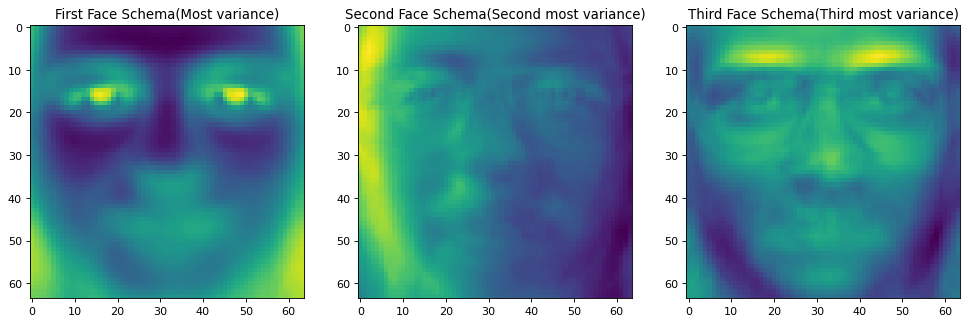

In [18]:
a_1, a_2, a_3 = V_T.T[:,0], V_T.T[:,1], V_T.T[:,2]
mostvar1 = np.reshape(a_1, (64, 64))
mostvar2 = np.reshape(a_2, (64, 64))
mostvar3 = np.reshape(a_3, (64, 64))

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15), dpi=80)

ax[0].imshow(mostvar1)
ax[0].set_title('First Face Schema(Most variance)')

ax[1].imshow(mostvar2)
ax[1].set_title('Second Face Schema(Second most variance)')

ax[2].imshow(mostvar3)
ax[2].set_title('Third Face Schema(Third most variance)')

The three archetypal face schemas along which faces vary the least means that the three schemas having the smallest variances. We know that the principal components giving the smallest variance from the variance function is the last columns of $V$ obtained from the SVD of $X$. Therefore, we select the last 3 columns of $V$.

Text(0.5, 1.0, 'Third Face Schema(Third least variance)')

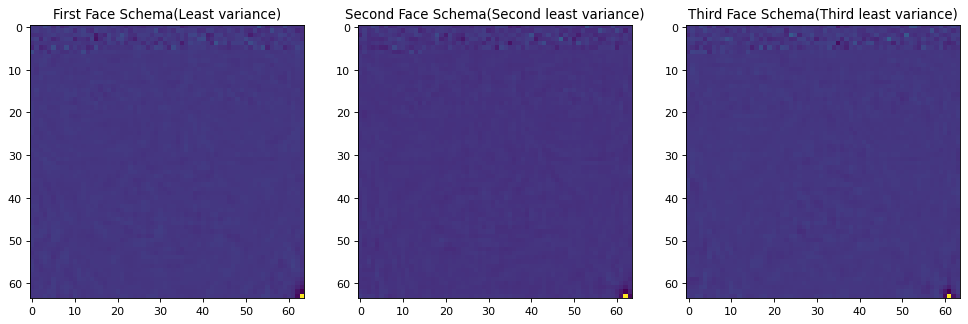

In [19]:
a_minus1, a_minus2, a_minus3 = V_T.T[:,-1], V_T.T[:,-2], V_T.T[:,-3]
leastvar1 = np.reshape(a_minus1, (64, 64))
leastvar2 = np.reshape(a_minus2, (64, 64))
leastvar3 = np.reshape(a_minus3, (64, 64))

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15), dpi=80)

ax[0].imshow(leastvar1)
ax[0].set_title('First Face Schema(Least variance)')

ax[1].imshow(leastvar2)
ax[1].set_title('Second Face Schema(Second least variance)')

ax[2].imshow(leastvar3)
ax[2].set_title('Third Face Schema(Third least variance)')

## Question 6

### a)

In [20]:
data = pd.read_csv('./data/Q6_bivariate.csv', header=None)
data

,0,1
0,0.392419,0.140249
1,0.550044,0.406444
2,0.616431,0.503982
3,0.381552,0.278035
4,0.945593,0.506211
...,...,...
295,0.559648,-0.167941
296,0.881967,-0.568163
297,0.905806,0.813619
298,0.904662,0.804778


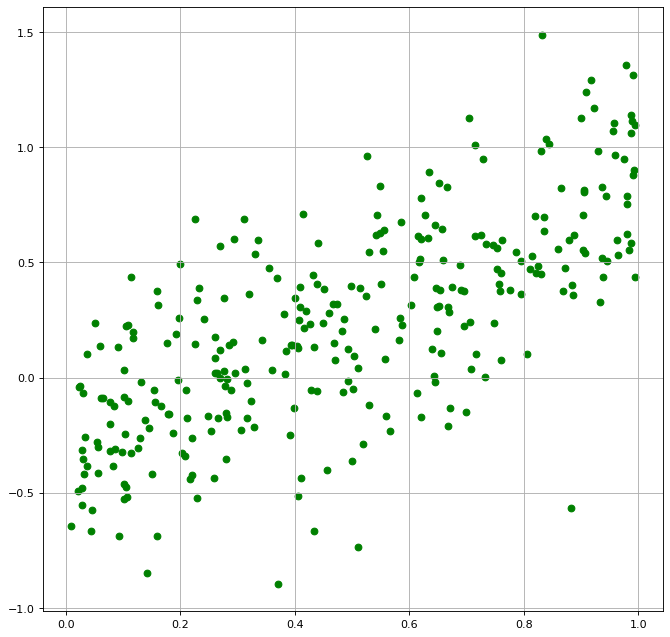

In [21]:
datas = np.array(data)
x, y = datas[:, 0], datas[:, 1]
fig, ax = plt.subplots(figsize=(10,10), dpi=80)
ax.scatter(x, y, color='green')
plt.grid(b=True, which='major')
plt.show()

### b)

In first order OLS, we obtain the $i$th prediction $\hat{y}^{(i)}$ as

$\hat{y}^{(i)} = A_{i1} \theta_1 + A_{i2} \theta_2$

where $Nx2$ matrix $A$ is defined as

$A_{i1} = 1$ and $A_{i1} = x^{(i)}$

and $\theta_1$ and $\theta_2$ are the parameters to be learned or decided. We can combine them in a vector $\theta = [\theta_1 \theta_2]$. Our loss function in OLS also defined as

$||y - \hat{y}||^2 = ||y - A \theta||^2 = ||A \theta - y||^2$

and the objective function is 

$A \theta = y$

We know that the data set contains different data points in its entries, therefore the columns of $A$ are linearly independent. This allows $A$ to have a valid left inverse. From the property of least squares solution, we get a optimal solution $\hat{\theta}$ as

$\hat{\theta} = A^{\dagger} y$

where $\dagger{A}$ is the left inverse of $A$. Therefore the optimal solution is

$\hat{\theta} = (A^T A)^{-1} A^T y$

OLS
Slope: 1.1051757371473048
Intercept: -0.3074673400254886


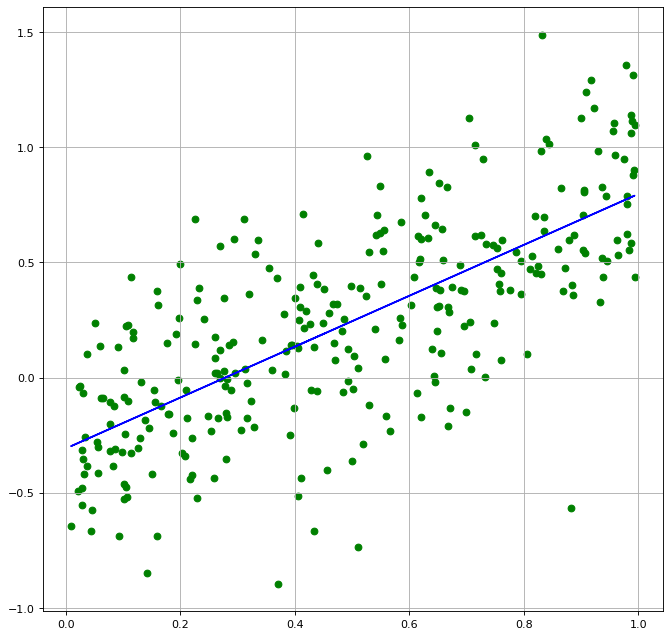

In [22]:
N = x.shape[0]
A = np.hstack((np.ones((N, 1)), np.atleast_2d(x).T))
theta_hat = np.linalg.inv(A.T @ A) @ A.T @ y

print('OLS')
print('Slope:', theta_hat[1])
print('Intercept:', theta_hat[0])

fig, ax = plt.subplots(figsize=(10,10), dpi=80)
ax.scatter(x, y, color='green')
ax.plot(x, A @ theta_hat, color='blue')
plt.grid(b=True, which='major')
plt.show()

### c)

PCA
Slope: 1.8104386020332188
Intercept: -0.6495198736572755


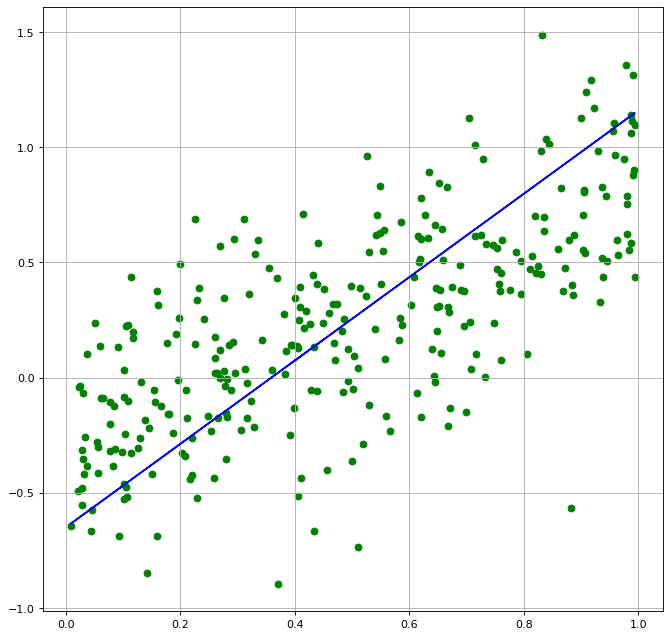

In [23]:
# centering
X = np.copy(datas)
xmean = np.mean(X[:,0])
ymean = np.mean(X[:,1])
X[:,0] -= xmean
X[:,1] -= ymean

_, _, V_T = np.linalg.svd(X)
a_1 = V_T.T[:, 0]

space = X[:,0] + xmean
pred = lambda x: (a_1[1] / a_1[0]) * (x - xmean) + ymean

print('PCA')
print('Slope:', a_1[1] / a_1[0])
print('Intercept:', -(a_1[1] / a_1[0]) * xmean + ymean)

fig, ax = plt.subplots(figsize=(10,10), dpi=80)
ax.scatter(x, y, color='green')
ax.plot(space, pred(space), color='blue')
plt.grid(b=True, which='major')
plt.show()

### d)

In [24]:
from scipy import odr

def f(B, x):
    return B[0]*x + B[1]

We firstly take weight coefficient as $1$.

In [25]:
linear_model = odr.Model(f)
data = odr.Data(x=x, y=y, wd=1)
odreg = odr.ODR(data, linear_model, beta0=[0., 0.])
output = odreg.run()
slope, intercept = output.beta
theta1 = np.flip(np.array(output.beta))
print('Result of ODR with wd=1')
print('Slope:', slope)
print('Intercept:', intercept)

Result of ODR with wd=1
Slope: 1.8104030350111668
Intercept: -0.6495026110930017


We now take weight coefficient as 2.

In [26]:
linear_model = odr.Model(f)
data = odr.Data(x=x, y=y, wd=2)
odreg = odr.ODR(data, linear_model, beta0=[0., 0.])
output = odreg.run()
slope, intercept = output.beta
theta2 = np.flip(np.array(output.beta))
print('Result of ODR with wd=2')
print('Slope:', slope)
print('Intercept:', intercept)

Result of ODR with wd=2
Slope: 1.6017553920390153
Intercept: -0.5483084715132345


Now, take weight coefficient as 10.

In [27]:
linear_model = odr.Model(f)
data = odr.Data(x=x, y=y, wd=10)
odreg = odr.ODR(data, linear_model, beta0=[0., 0.])
output = odreg.run()
slope, intercept = output.beta
theta3 = np.flip(np.array(output.beta))
print('Result of ODR with wd=10')
print('Slope:', slope)
print('Intercept:', intercept)

Result of ODR with wd=10
Slope: 1.2319202908649909
Intercept: -0.3689385069096357


Lastly, take weight coefficent as 100.

In [28]:
linear_model = odr.Model(f)
data = odr.Data(x=x, y=y, wd=100)
odreg = odr.ODR(data, linear_model, beta0=[0., 0.])
output = odreg.run()
slope, intercept = output.beta
theta4 = np.flip(np.array(output.beta))
print('Result of ODR with wd=100')
print('Slope:', slope)
print('Intercept:', intercept)

Result of ODR with wd=100
Slope: 1.1180848400890946
Intercept: -0.3137282604568107


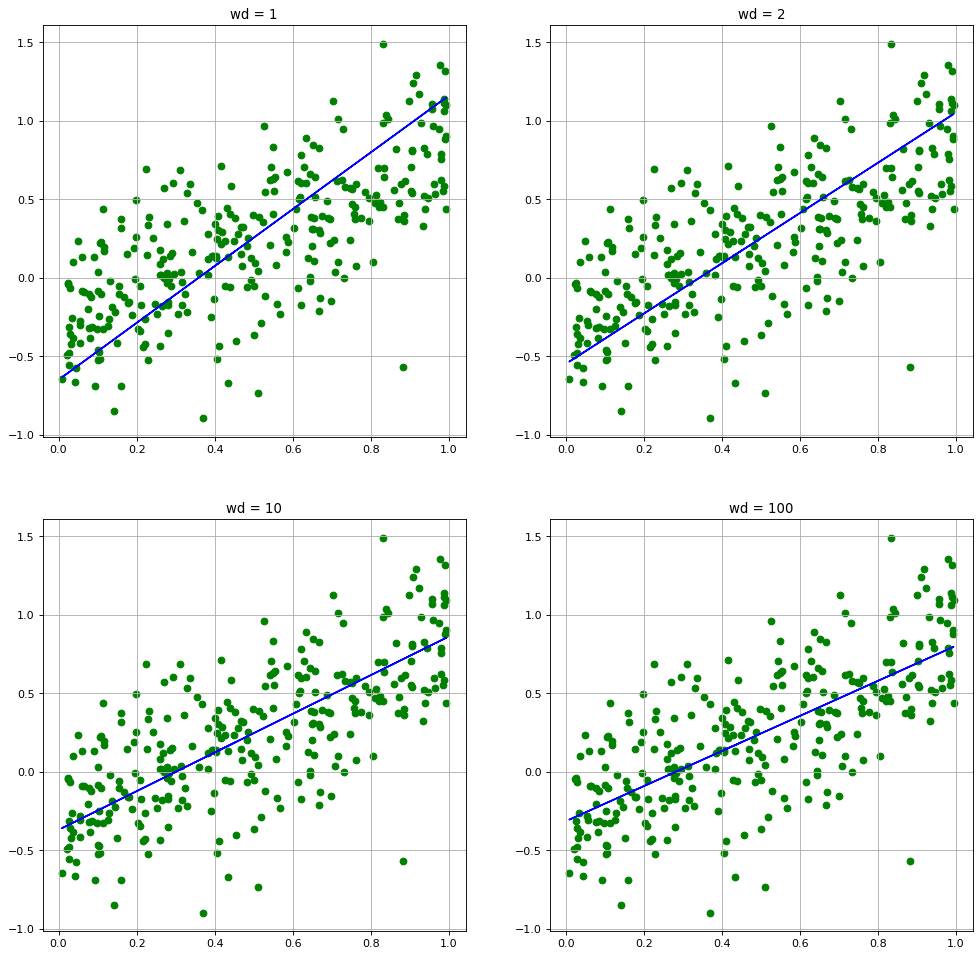

In [29]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,15), dpi=80)

ax[0,0].scatter(x, y, color='green')
ax[0,0].plot(x, A @ theta1, color='blue')
ax[0,0].grid(b=True, which='major')
ax[0,0].set_title('wd = 1')

ax[0,1].scatter(x, y, color='green')
ax[0,1].plot(x, A @ theta2, color='blue')
ax[0,1].grid(b=True, which='major')
ax[0,1].set_title('wd = 2')

ax[1,0].scatter(x, y, color='green')
ax[1,0].plot(x, A @ theta3, color='blue')
ax[1,0].grid(b=True, which='major')
ax[1,0].set_title('wd = 10')

ax[1,1].scatter(x, y, color='green')
ax[1,1].plot(x, A @ theta4, color='blue')
ax[1,1].grid(b=True, which='major')
ax[1,1].set_title('wd = 100')
plt.show()

### e)

ODR solution with weight coefficient equals to 100 is the one closest to OLS solution. ODR solution with weight coefficient equals to 1 is the one closest to PCA solution. To see their similarity in a closer perspective, you can take a look at their one to one plots below.

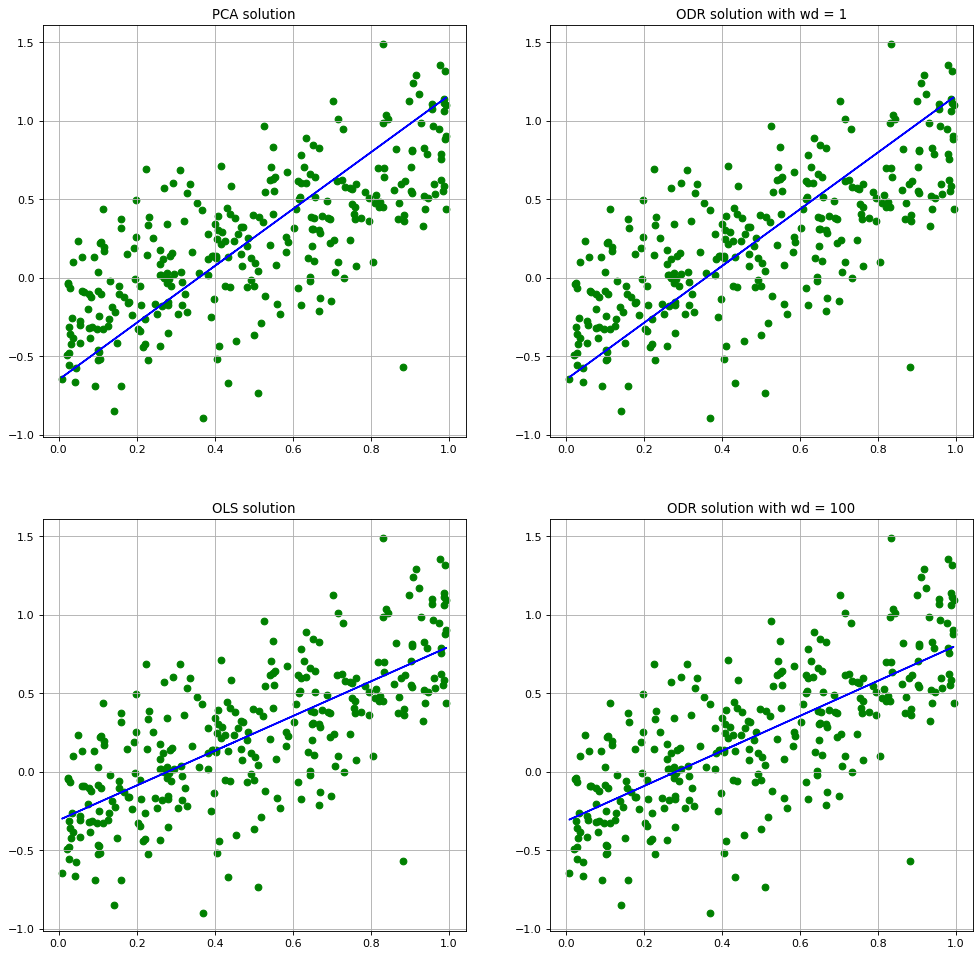

In [30]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,15), dpi=80)

ax[0,0].scatter(x, y, color='green')
ax[0,0].plot(space, pred(space), color='blue')
ax[0,0].grid(b=True, which='major')
ax[0,0].set_title('PCA solution')

ax[0,1].scatter(x, y, color='green')
ax[0,1].plot(x, A @ theta1, color='blue')
ax[0,1].grid(b=True, which='major')
ax[0,1].set_title('ODR solution with wd = 1')

ax[1,0].scatter(x, y, color='green')
ax[1,0].plot(x, A @ theta_hat, color='blue')
ax[1,0].grid(b=True, which='major')
ax[1,0].set_title('OLS solution')

ax[1,1].scatter(x, y, color='green')
ax[1,1].plot(x, A @ theta4, color='blue')
ax[1,1].grid(b=True, which='major')
ax[1,1].set_title('ODR solution with wd = 100')
plt.show()

OLS and ODR with $wd = 100$ is similar since OLS is like a special version of ODR with $wd = \infty$. In OLS, the input data points must match with the inputs to the regression or predition function. On the other hand, ODR gives some flexibility regression by allowing small perturbations between input data poins and inputs to the regression function. Of course, it penalizes the flexibility it gives to not diverge from the initial data points. In this manner, OLS is the ODR solution with $wd = \infty$. In our ODR solutions, the maximum $wd$ value we tried was $100$ and this is the reason why ODR with $wd =100$ was closest to OLS. Also we note that 100 is a very large number for penalizing the perturbations in the initial data points, thus, the plot of OLS and ODR with $wd = 100$ was extremely close.

PCA and ODR with $wd = 1$ is similar since their problem formulations are the same in their core. ODR with $wd = 1$ is the original **Orthogonal distance regression** explained in the book **IALA**. As referenced from the book, this ODR with $wd = 1$ fits a curve that passes near all data points, measured by the minimum distance from the data points to the curve. On the other hand, as stated in the assignment description $^3$, the alternative formulation of PCA aims for the least distance(error) between original points and projected points and gives the same result as PCA we implemented. Therefore, this minimum error formulation tries to minimize distance to original data points to the curve we fit(our projected points). But we notice that the objectives for PCA and ODR with $wd = 1$ are the same. Thus, they result in the same formulations and same regression curves. This can also be seen from comparing the slope and intercept we got from PCA and ODR with $wd = 1$. This parameters are exactly the same at those experiments:

Slope: $1.8104$ \
Intercept: $-0.6495$

To conclude, PCA and ODr with $wd = 1$ represent the same regression and they fit exactly the same linear curve in our case.